In [1]:
pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 33.7 MB/s 
     |████████████████████████████████| 9.8 MB 72.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import CSV File
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('TCS.csv',sep=',', parse_dates=['Date'], date_parser=dateparse)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [5]:
#droping some columns
df=df.drop(['Symbol','Series','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)

In [7]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332


In [8]:
df.tail()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
4282,2021-11-24,3464.25,3472.20,3493.05,3424.00,3431.95,3443.30,3469.80,2161746
4283,2021-11-25,3443.30,3443.90,3463.00,3434.05,3450.00,3445.90,3451.54,1849619
4284,2021-11-26,3445.90,3425.00,3490.00,3411.90,3439.20,3446.85,3454.40,1941251
4285,2021-11-29,3446.85,3447.15,3529.35,3406.45,3503.50,3502.00,3490.28,2981745
4286,2021-11-30,3502.00,3491.00,3563.75,3491.00,3535.00,3529.15,3535.48,5588446


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4287 non-null   datetime64[ns]
 1   Prev Close  4287 non-null   float64       
 2   Open        4287 non-null   float64       
 3   High        4287 non-null   float64       
 4   Low         4287 non-null   float64       
 5   Last        4287 non-null   float64       
 6   Close       4287 non-null   float64       
 7   VWAP        4287 non-null   float64       
 8   Volume      4287 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 301.6 KB


In [10]:
df.isna().sum()

Date          0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
dtype: int64

In [11]:
df['Date'].head()

0   2004-08-25
1   2004-08-26
2   2004-08-27
3   2004-08-30
4   2004-08-31
Name: Date, dtype: datetime64[ns]

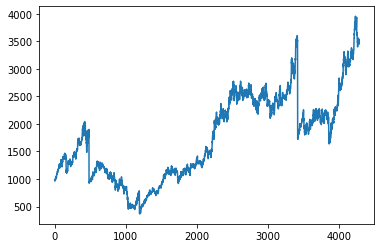

In [12]:
df['Close'].plot()

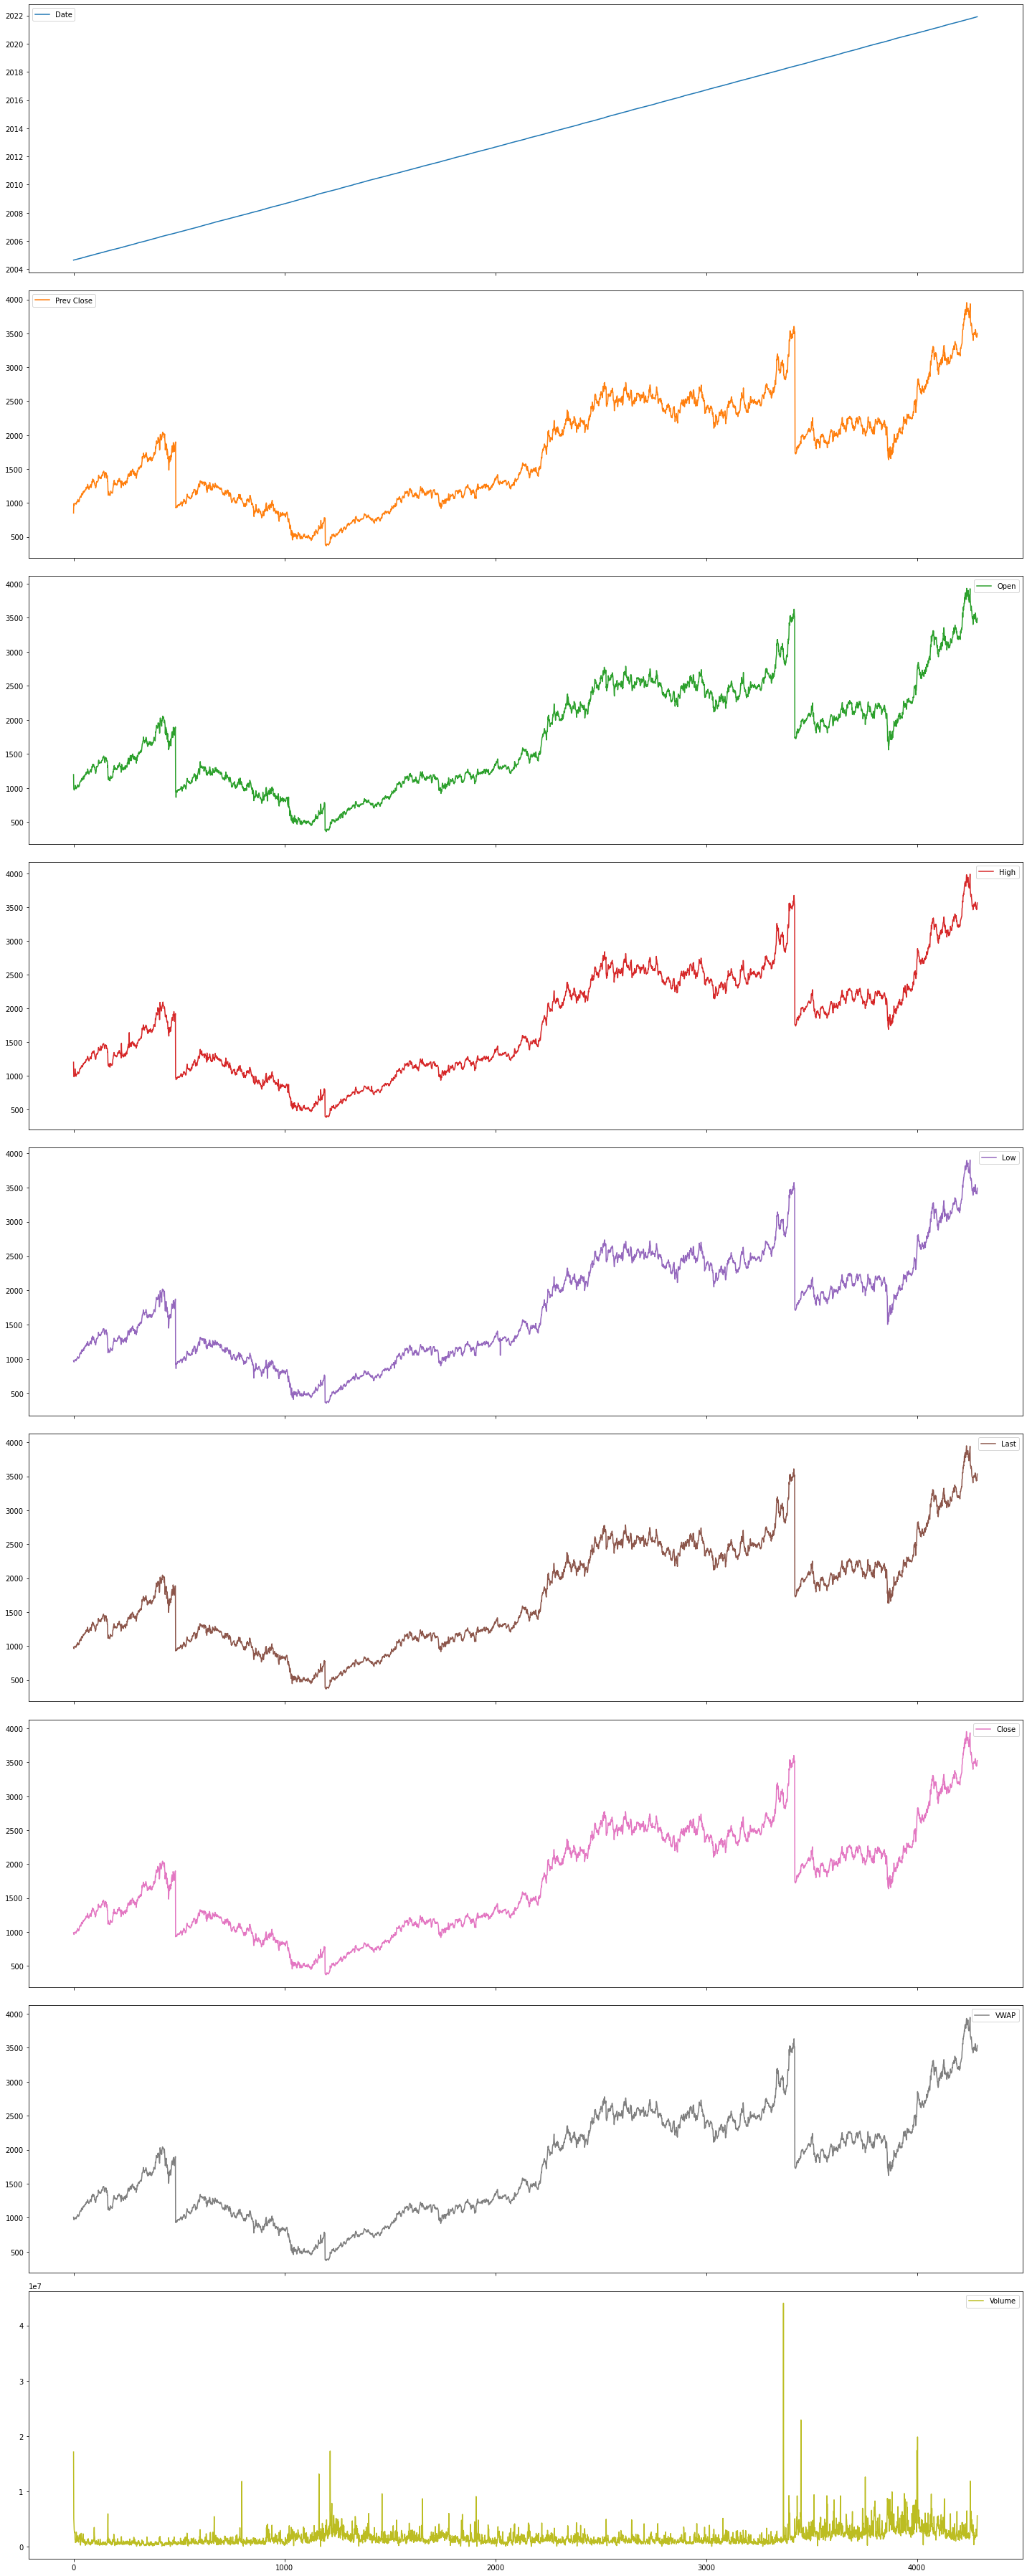

In [13]:
df.plot(figsize=(20,50),subplots=True)

plt.tight_layout()
plt.show()

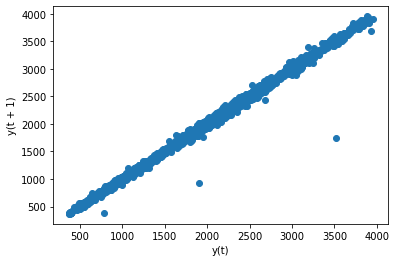

In [14]:
# Lag Scatter Plots for close
from pandas.plotting import lag_plot
lag_plot(df['Close'])
plt.show()

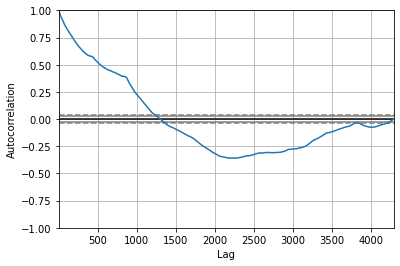

In [15]:
#Autocorrelation Plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

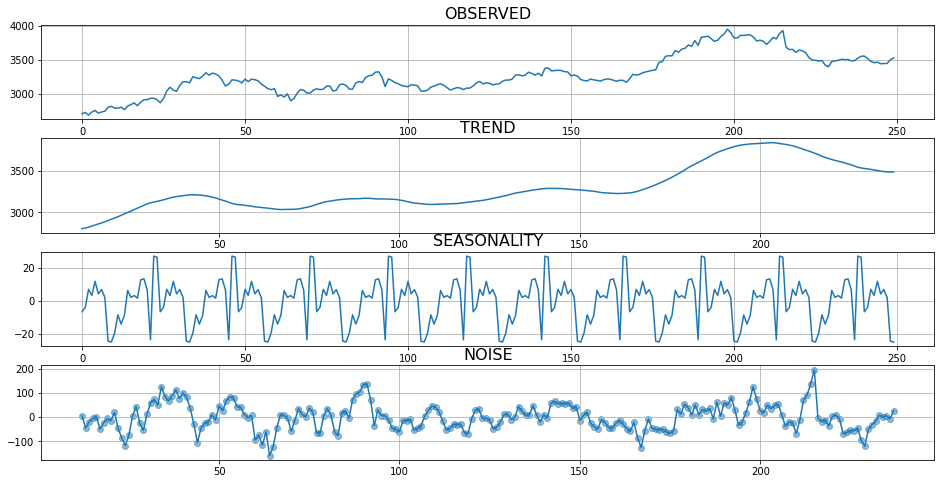

In [16]:
#Decompose the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
def checking(df,samples=250, period=24):
    if samples == 'all':
        res = seasonal_decompose(df['Close'].values, period=period)
    else:
        res = seasonal_decompose(df["Close"].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()
checking(df)

In [17]:
#log value for Close
df['logClose']=np.log(df['Close'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4287 non-null   datetime64[ns]
 1   Prev Close  4287 non-null   float64       
 2   Open        4287 non-null   float64       
 3   High        4287 non-null   float64       
 4   Low         4287 non-null   float64       
 5   Last        4287 non-null   float64       
 6   Close       4287 non-null   float64       
 7   VWAP        4287 non-null   float64       
 8   Volume      4287 non-null   int64         
 9   logClose    4287 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 335.0 KB


In [18]:
#Detrending the Close Value using Log values
df['Detrend'] = df['logClose'] - df['logClose'].shift(1)
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,logClose,Detrend
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,6.895632,NaN
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,6.886532,-0.009100
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,6.869690,-0.016842
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,6.894417,0.024727
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,6.895784,0.001367


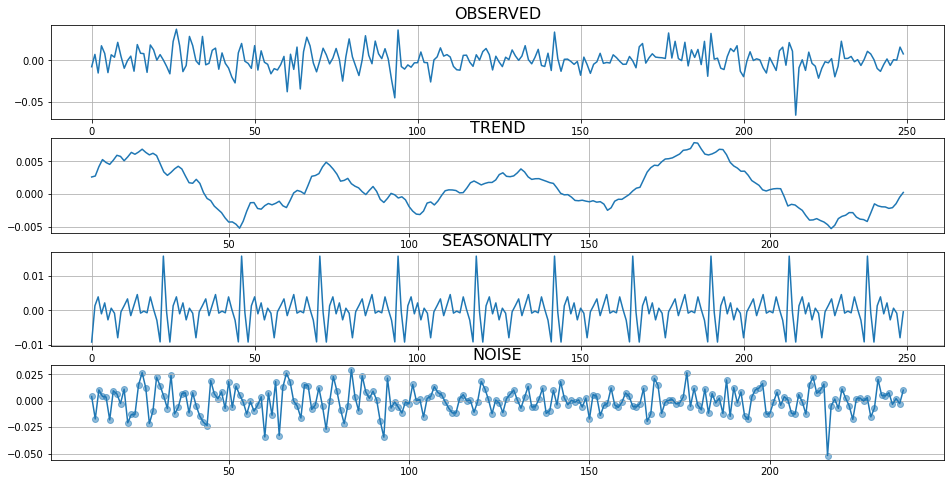

In [19]:
#Detrending the stochastic trend
from statsmodels.tsa.seasonal import seasonal_decompose
def checking(df,samples=250, period=24):
    if samples == 'all':
        res = seasonal_decompose(df['Detrend'].values, period=period)
    else:
        res = seasonal_decompose(df["Detrend"].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()
checking(df)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
core_columns =  ['Prev Close','Open','High','Low','Last','Close','VWAP','Volume']
for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [23]:
#for Heat Map
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

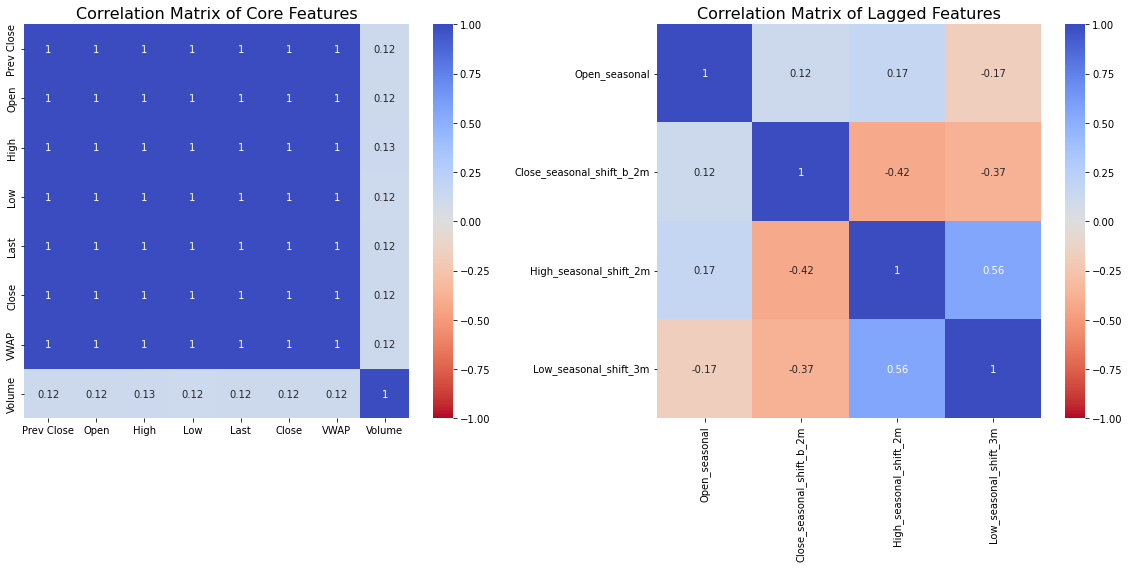

In [24]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'Open_seasonal',         
    'Close_seasonal_shift_b_2m',
    'High_seasonal_shift_2m', 
    'Low_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

In [20]:
#1st order Difference
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)
df['Close First Difference'].head()

0      NaN
1    -8.95
2   -16.35
3    24.10
4     1.35
Name: Close First Difference, dtype: float64

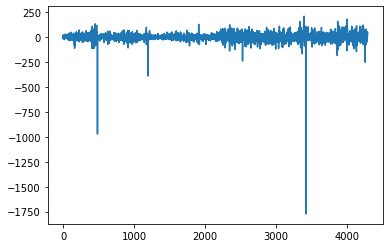

In [21]:
#plotting 1st order Difference
df['Close First Difference'].plot()

In [25]:
df['Seasonal First Difference'] = df['Close'] - df['Close'].shift(2)
df['Seasonal First Difference'].head()

0      NaN
1      NaN
2   -25.30
3     7.75
4    25.45
Name: Seasonal First Difference, dtype: float64

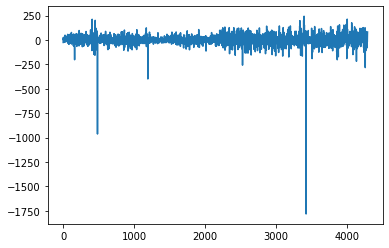

In [26]:
df['Seasonal First Difference'].plot()

In [27]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag="AIC")
    print("1. ADF :",dftest[0]);
    print("2. P-Value :",dftest[1]);
    print("3. Number of Lags :",dftest[1]);
ad_test(df['Close'])

1. ADF : -1.278293286151796
2. P-Value : 0.6390437345513058
3. Number of Lags : 0.6390437345513058


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
#training AutoArima for Close
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44611.785, Time=5.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44608.244, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44610.244, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44610.245, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44607.022, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44609.312, Time=2.70 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 9.255 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4287
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -22302.511
Date:                Sat, 23 Jul 2022   AIC                          44607.022
Time:                        06:17:50   BIC                          44613.385
Sample:                             0   HQIC                         44609.270
                               - 4287                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1937.2686      2.283    848.633      0.000    1932.794    1941.743
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          80640348.62
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                           -17.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       674.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(4287, 69)
(4257, 69) (30, 69)


In [40]:
train.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,logClose,...,VWAP_seasonal_shift_b_1m,VWAP_seasonal_shift_1m,VWAP_seasonal_shift_2m,VWAP_seasonal_shift_3m,Volume_seasonal_shift_b_2m,Volume_seasonal_shift_b_1m,Volume_seasonal_shift_1m,Volume_seasonal_shift_2m,Volume_seasonal_shift_3m,Seasonal First Difference
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,6.895632,...,5.212111,NaN,NaN,NaN,-16478.462878,-35487.839628,NaN,NaN,NaN,NaN
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,6.886532,...,7.228304,NaN,NaN,NaN,-263573.840597,-3717.388339,NaN,NaN,NaN,NaN
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,6.869690,...,9.151253,NaN,NaN,NaN,-166771.196421,-74890.790734,NaN,NaN,NaN,-25.30
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,6.894417,...,11.363854,NaN,NaN,NaN,-8138.255675,213883.628465,NaN,NaN,NaN,7.75
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,6.895784,...,14.651391,-4.072423,NaN,NaN,47227.333589,-16478.462878,312021.034086,NaN,NaN,25.45


In [51]:
#train Arima model for Close
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4257
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -22153.236
Date:                Sat, 23 Jul 2022   AIC                          44308.472
Time:                        06:31:46   BIC                          44314.828
Sample:                             0   HQIC                         44310.718
                               - 4257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1943.4949      2.298    845.910      0.000    1938.992    1947.998
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          80185688.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                           -18.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       674.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
#predicting Values for Close
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

4257    3611.45
4258    3611.45
4259    3611.45
4260    3611.45
4261    3611.45
4262    3611.45
4263    3611.45
4264    3611.45
4265    3611.45
4266    3611.45
4267    3611.45
4268    3611.45
4269    3611.45
4270    3611.45
4271    3611.45
4272    3611.45
4273    3611.45
4274    3611.45
4275    3611.45
4276    3611.45
4277    3611.45
4278    3611.45
4279    3611.45
4280    3611.45
4281    3611.45
4282    3611.45
4283    3611.45
4284    3611.45
4285    3611.45
4286    3611.45
Name: predicted_mean, dtype: float64


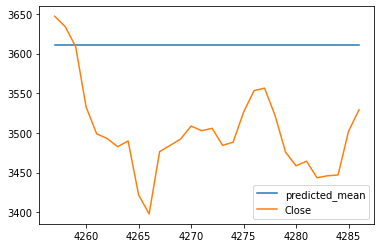

In [53]:
#Predicted mean plot for Close
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [74]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag="AIC")
    print("1. ADF :",dftest[0]);
    print("2. P-Value :",dftest[1]);
    print("3. Number of Lags :",dftest[1]);
ad_test(df['Close First Difference'].dropna())

1. ADF : -47.466318796181014
2. P-Value : 0.0
3. Number of Lags : 0.0


In [71]:
#training AutoArima for Close First Difference
stepwise_fit1 = auto_arima(df['Close First Difference'].dropna(), trace=True,
suppress_warnings = True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44611.786, Time=5.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=44608.244, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44610.244, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44610.245, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44607.022, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=44609.312, Time=3.58 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 10.192 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4286
Model:                        SARIMAX   Log Likelihood              -22302.511
Date:                Sat, 23 Jul 2022   AIC                          44607.022
Time:                        06:54:34   BIC                          44613.385
Sample:                             0   HQIC                         44609.270
                               - 4286                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1937.7205      2.284    848.435      0.000    1933.244    1942.197
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          80640348.62
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                           -17.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       674.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
#train Arima model for Close
from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(train['Close First Difference'],order=(0,0,0))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Close First Difference   No. Observations:                 4257
Model:                              ARIMA   Log Likelihood              -22152.820
Date:                    Sat, 23 Jul 2022   AIC                          44309.640
Time:                            06:58:13   BIC                          44322.352
Sample:                                 0   HQIC                         44314.132
                                   - 4257                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6213      0.938      0.662      0.508      -1.217       2.460
sigma2      1943.6439      3.187    609.850      0.000    1937.397    1949.890
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          80242338.25
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                           -18.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       674.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
#predicting Values for Close
start=len(train)
end=len(train)+len(test)-1
pred1=model2.predict(start=start,end=end,typ='levels')
pred1.index=df.index[start:end+1]
print(pred1)

4257    0.621254
4258    0.621254
4259    0.621254
4260    0.621254
4261    0.621254
4262    0.621254
4263    0.621254
4264    0.621254
4265    0.621254
4266    0.621254
4267    0.621254
4268    0.621254
4269    0.621254
4270    0.621254
4271    0.621254
4272    0.621254
4273    0.621254
4274    0.621254
4275    0.621254
4276    0.621254
4277    0.621254
4278    0.621254
4279    0.621254
4280    0.621254
4281    0.621254
4282    0.621254
4283    0.621254
4284    0.621254
4285    0.621254
4286    0.621254
Name: predicted_mean, dtype: float64


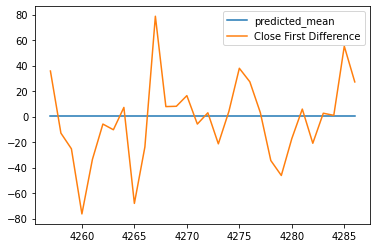

In [79]:
#Predicted mean plot for Close
pred.plot(legend=True)
test['Close First Difference'].plot(legend=True)

In [80]:
#Forecasting Accuracy for Close First Difference
from sklearn.metrics import mean_squared_error
from math import sqrt
#MSE
mse=mean_squared_error(test['Close First Difference'],pred)
print(mse)
#RMSE
rmse=sqrt(mean_squared_error(test['Close First Difference'],pred))
print(rmse)

1057.5417379699861
32.519866819684026


In [81]:
#MAD
MAD=test['Close First Difference'].mad()
print(MAD)

24.29288888888888


In [82]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Close First Difference'],pred)
print(mae)

24.068583055199497


In [84]:
#MEAN
df['Close First Difference'].mean()

0.5929071395240317

In [93]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df1= pd.read_csv('TCS.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,logClose,...,VWAP_seasonal_shift_b_1m,VWAP_seasonal_shift_1m,VWAP_seasonal_shift_2m,VWAP_seasonal_shift_3m,Volume_seasonal_shift_b_2m,Volume_seasonal_shift_b_1m,Volume_seasonal_shift_1m,Volume_seasonal_shift_2m,Volume_seasonal_shift_3m,Seasonal First Difference
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,6.895632,...,5.212111,NaN,NaN,NaN,-16478.462878,-35487.839628,NaN,NaN,NaN,NaN
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,6.886532,...,7.228304,NaN,NaN,NaN,-263573.840597,-3717.388339,NaN,NaN,NaN,NaN
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,6.869690,...,9.151253,NaN,NaN,NaN,-166771.196421,-74890.790734,NaN,NaN,NaN,-25.30
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,6.894417,...,11.363854,NaN,NaN,NaN,-8138.255675,213883.628465,NaN,NaN,NaN,7.75
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,6.895784,...,14.651391,-4.072423,NaN,NaN,47227.333589,-16478.462878,312021.034086,NaN,NaN,25.45


In [97]:
df1=df1.drop(['Symbol','Series','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)

In [98]:
df1.var(ddof=0)

Prev Close    6.054238e+05
Open          6.057423e+05
High          6.146815e+05
Low           5.975448e+05
Last          6.061991e+05
Close         6.059653e+05
VWAP          6.061601e+05
Volume        2.576877e+12
dtype: float64

In [99]:
#StandardScaler for the Dataframe
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1.iloc[:,:-1] = ss.fit_transform(df1.iloc[:,:-1])
print(df)

           Date  Prev Close     Open     High      Low     Last    Close  \
0    2004-08-25      850.00  1198.70  1198.70   979.00   985.00   987.95   
1    2004-08-26      987.95   992.00   997.00   975.30   976.85   979.00   
2    2004-08-27      979.00   982.40   982.40   958.55   961.20   962.65   
3    2004-08-30      962.65   969.90   990.00   965.00   986.40   986.75   
4    2004-08-31      986.75   986.50   990.00   976.00   987.80   988.10   
...         ...         ...      ...      ...      ...      ...      ...   
4282 2021-11-24     3464.25  3472.20  3493.05  3424.00  3431.95  3443.30   
4283 2021-11-25     3443.30  3443.90  3463.00  3434.05  3450.00  3445.90   
4284 2021-11-26     3445.90  3425.00  3490.00  3411.90  3439.20  3446.85   
4285 2021-11-29     3446.85  3447.15  3529.35  3406.45  3503.50  3502.00   
4286 2021-11-30     3502.00  3491.00  3563.75  3491.00  3535.00  3529.15   

         VWAP    Volume  logClose  ...  VWAP_seasonal_shift_b_1m  \
0     1008.32  1711

In [100]:
df.var(ddof=0)

Prev Close                    6.054238e+05
Open                          6.057423e+05
High                          6.146815e+05
Low                           5.975448e+05
Last                          6.061991e+05
                                  ...     
Volume_seasonal_shift_b_1m    1.663886e+10
Volume_seasonal_shift_1m      1.666343e+10
Volume_seasonal_shift_2m      1.665901e+10
Volume_seasonal_shift_3m      1.666919e+10
Seasonal First Difference     3.873854e+03
Length: 68, dtype: float64

In [102]:
#Normalizer the Dataframe
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df1.dropna().iloc[:,:-1] = norm.fit_transform(df1.dropna().iloc[:,:-1])
df1

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2004-08-25,-1.159383,-0.713369,-0.734491,-0.973672,-0.986007,-0.982461,-0.956482,17116372
2004-08-26,-0.982090,-0.978949,-0.991756,-0.978459,-0.996475,-0.993958,-0.985600,5055400
2004-08-27,-0.993592,-0.991284,-1.010378,-1.000127,-1.016575,-1.014962,-1.005778,3830750
2004-08-30,-1.014605,-1.007345,-1.000684,-0.991783,-0.984209,-0.984002,-0.989453,3058151
2004-08-31,-0.983632,-0.986016,-1.000684,-0.977553,-0.982411,-0.982268,-0.990057,2649332
...,...,...,...,...,...,...,...,...
2021-11-24,2.200448,2.207762,2.191915,2.189287,2.156798,2.171742,2.205086,2161746
2021-11-25,2.173523,2.171401,2.153587,2.202289,2.179981,2.175082,2.181633,1849619
2021-11-26,2.176864,2.147117,2.188025,2.173634,2.166110,2.176302,2.185306,1941251


In [104]:
#MinMaxScaler for Datafarame
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df2 = trans.fit_transform(df1)
df2

array([[0.13471669, 0.23492997, 0.22727461, ..., 0.17316536, 0.17877707,
        0.38845705],
       [0.17316536, 0.17703081, 0.17143529, ..., 0.17067087, 0.17244366,
        0.11443891],
       [0.17067087, 0.17434174, 0.16739338, ..., 0.16611388, 0.16805469,
        0.08661558],
       ...,
       [0.85823183, 0.85854342, 0.86160597, ..., 0.85849661, 0.86214844,
        0.04368729],
       [0.85849661, 0.8647479 , 0.87249976, ..., 0.87386772, 0.87217238,
        0.06732669],
       [0.87386772, 0.87703081, 0.88202317, ..., 0.88143482, 0.88480009,
        0.1265494 ]])